In [14]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

Text(0, 0.5, 'Amplitude')

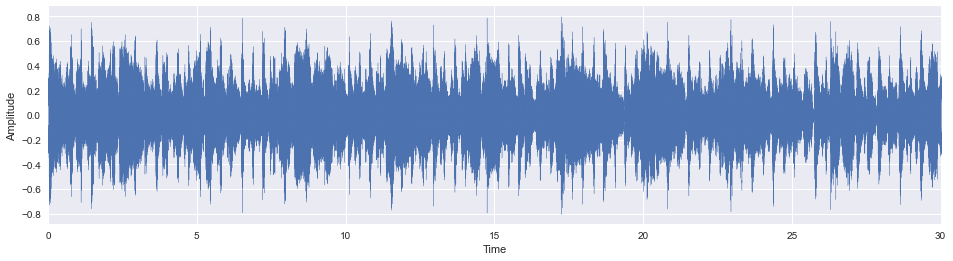

In [15]:
file_path = 'GTZAN/blues/blues.00008.wav'
signal, sample_rate = librosa.load(file_path, sr=22050)  # sample_rate 22050 by default

plt.figure(figsize=(16, 4))
librosa.display.waveplot(signal, sr=sample_rate)
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [16]:
from IPython.display import Audio

Audio(data=signal, rate=sample_rate)  # very bluesy

Text(0, 0.5, 'Magnitude')

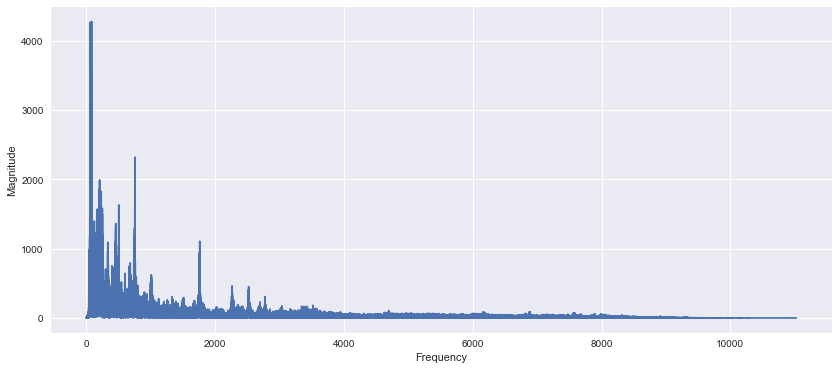

In [18]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sample_rate, len(magnitude))

# Nyquist theorem
l_magnitude = magnitude[:len(magnitude)//2]
l_frequency = frequency[:len(frequency)//2]

plt.figure(figsize=(14, 6))
plt.plot(l_frequency, l_magnitude)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# this is a snapshot of the entire track

Text(0, 0.5, 'Frequency')

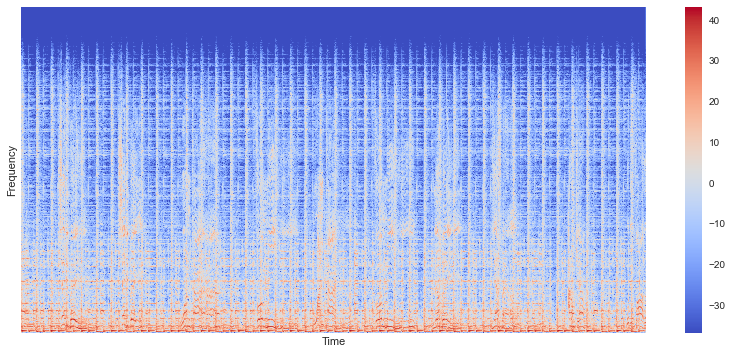

In [19]:
# Need to do Short-Time Fourier Transform (STFT) to see time-based trends

n_fft = 2048  # number of samples in each window
hop_length = 512  # amount we slide the window each fourier transform, this implies overlap

stft = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=(14, 6))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Frequency')

Text(0, 0.5, 'MFCC')

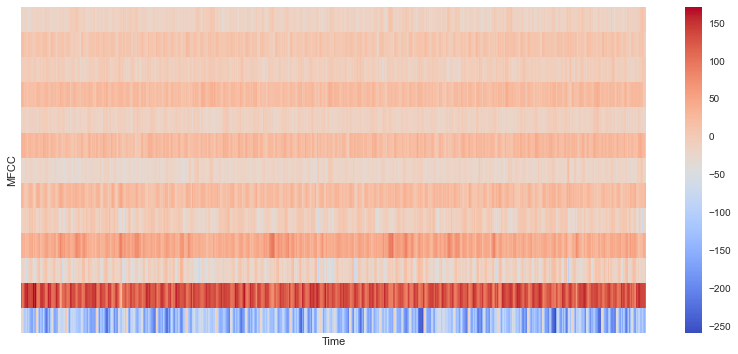

In [20]:
# Calculate MFCC

MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
plt.figure(figsize=(14, 6))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('MFCC')